# Bank Marketing Data Set

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Input variables:

### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# 1. Import Libraries

import all library that we need for this project

In [75]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import random # generating random numbers

import matplotlib # for plotting
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
%matplotlib inline

# for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# 2. Data Loading

Loading the dataset needed

In [5]:
# set dataframe yang mengacu ke bank-additional-full.csv
df_baf = pd.read_csv("dataset/bank-additional-full.csv", sep = ';')

df_baf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# set other dataframe
df_ba = pd.read_csv("dataset/bank-additional.csv", sep = ';')

df_bf = pd.read_csv("dataset/bank-full.csv", sep = ';')

df_b = pd.read_csv("dataset/bank.csv", sep = ';')


In [18]:
print('panjang dataset bank-additional-full.csv : ', len(df_baf.index))
print('panjang dataset bank-additional.csv : ', len(df_ba.index))
print('panjang dataset bank-full.csv : ', len(df_bf.index))
print('panjang dataset bank.csv : ', len(df_b.index))

panjang dataset bank-additional-full.csv :  41188
panjang dataset bank-additional.csv :  4119
panjang dataset bank-full.csv :  45211
panjang dataset bank.csv :  4521


In [21]:
print('dimensi dataset bank-additional-full.csv : ', df_baf.shape)
print('dimensi dataset bank-additional.csv : ', df_ba.shape)
print('dimensi dataset bank-full.csv : ', df_bf.shape)
print('dimensi dataset bank.csv : ', df_b.shape)

dimensi dataset bank-additional-full.csv :  (41188, 21)
dimensi dataset bank-additional.csv :  (4119, 21)
dimensi dataset bank-full.csv :  (45211, 17)
dimensi dataset bank.csv :  (4521, 17)


In [22]:
print('hitung target pada dataset bank-additional-full.csv : ', df_baf['y'].value_counts())
print('hitung target pada dataset bank-additional.csv : ', df_ba['y'].value_counts())
print('hitung target pada dataset bank-full.csv : ', df_bf['y'].value_counts())
print('hitung target pada dataset bank.csv : ', df_b['y'].value_counts())

hitung target pada dataset bank-additional-full.csv :  no     36548
yes     4640
Name: y, dtype: int64
hitung target pada dataset bank-additional.csv :  no     3668
yes     451
Name: y, dtype: int64
hitung target pada dataset bank-full.csv :  no     39922
yes     5289
Name: y, dtype: int64
hitung target pada dataset bank.csv :  no     4000
yes     521
Name: y, dtype: int64


## check missing value

In [24]:
df_baf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
df_ba.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
df_bf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [27]:
df_b.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

no missing value found.

In [88]:
df_baf.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [87]:
df_ba.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [89]:
df_bf.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [90]:
df_b.describe()

,age,balance,day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


# 3. Data Preprocessing & Exploration

we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In [35]:
# Drop 'duration' column
df_baf = df_baf.drop('duration', axis=1)
df_ba = df_ba.drop('duration', axis=1)
df_bf = df_bf.drop('duration', axis=1)
df_b = df_b.drop('duration', axis=1)

## Exploratory Data Analysis for numerical variable

In [36]:
#save the Target variable 

# dataset 1

y1 = df_baf['y']

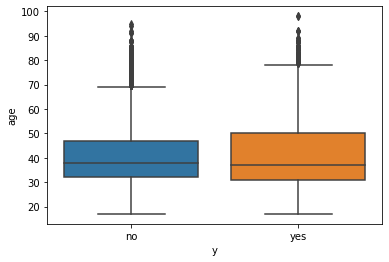

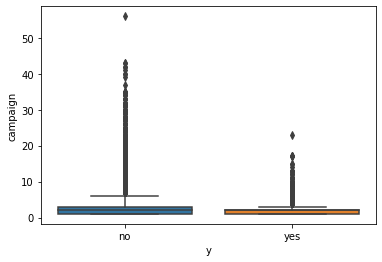

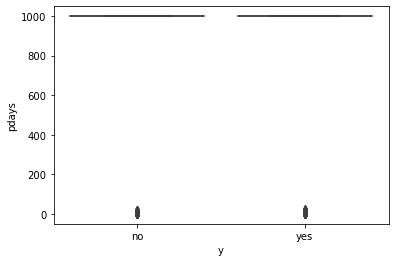

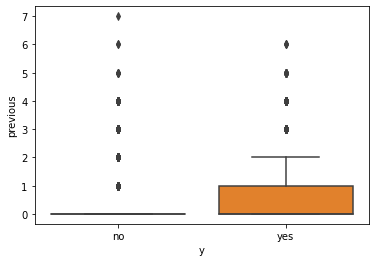

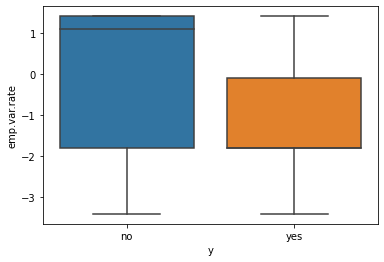

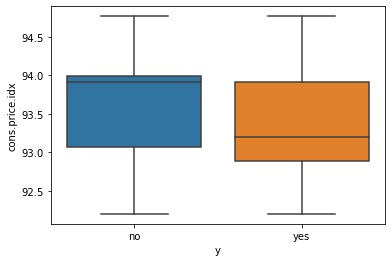

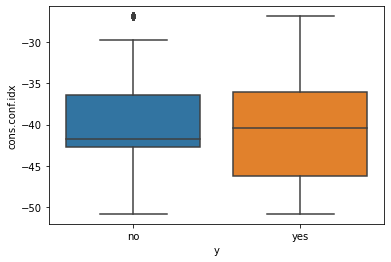

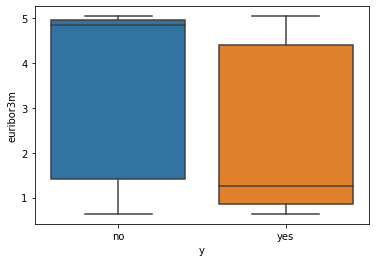

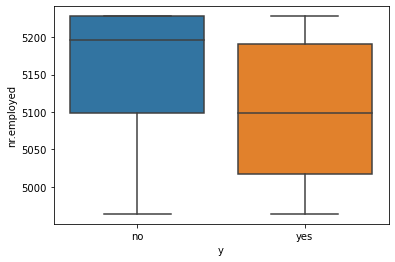

In [37]:
num_var = ["age","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df_baf)
  plt.show();

## Scale Numeric Data to avoid outlier presence

Using StandardScaler() function from sklearn we can scale each our columns that contains numerical data. The scaling will be done using the formula below:
𝑍=𝑋−𝑈𝑆 
Where:
𝑍:  scaled value
𝑋:  original value
𝑈:  mean of the data
𝑆:  standard deviation of the data

In [61]:
# Copying original dataframe

# dataset 1

df_baf_ready = df_baf.copy()

scaler1 = StandardScaler()
df_baf_ready[num_var] = scaler1.fit_transform(df_baf_ready[num_var])

df_baf_ready.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no


In [92]:
# repeat the steps above for other datasets

# dataset 2

df_ba_ready = df_ba.copy()

scaler2 = StandardScaler()
df_ba_ready[num_var] = scaler2.fit_transform(df_ba_ready[num_var])

df_ba_ready.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.980752,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,-0.209228,0.201031,-0.351356,nonexistent,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,no
1,-0.107991,services,single,high.school,no,no,no,telephone,may,fri,0.569634,0.201031,-0.351356,nonexistent,0.649441,0.715193,0.892269,0.711698,0.332862,no
2,-1.465619,services,married,high.school,no,yes,no,telephone,jun,wed,-0.598660,0.201031,-0.351356,nonexistent,0.841389,1.528273,-0.283172,0.773427,0.836535,no
3,-0.204965,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,0.180203,0.201031,-0.351356,nonexistent,0.841389,1.528273,-0.283172,0.771697,0.836535,no
4,0.667795,admin.,married,university.degree,no,yes,no,cellular,nov,mon,-0.598660,0.201031,-0.351356,nonexistent,-0.118350,-0.655478,-0.326707,0.328632,0.398028,no


In [93]:
# repeat the steps above for other datasets

# dataset 3

num_var_2 = ["age","balance", "day", "campaign", "pdays", "previous"]

df_bf_ready = df_bf.copy()

scaler3 = StandardScaler()
df_bf_ready[num_var_2] = scaler3.fit_transform(df_bf_ready[num_var_2])

df_bf_ready.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,-0.569351,-0.411453,-0.25194,unknown,no


In [94]:
# repeat the steps above for other datasets

# dataset 4

df_b_ready = df_b.copy()

scaler4 = StandardScaler()
df_b_ready[num_var_2] = scaler4.fit_transform(df_b_ready[num_var_2])

df_b_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,-1.056270,unemployed,married,primary,no,0.121072,no,no,cellular,0.374052,oct,-0.576829,-0.407218,-0.320413,unknown,no
1,-0.772583,services,married,secondary,no,1.118644,yes,yes,cellular,-0.596026,may,-0.576829,2.989044,2.041734,failure,no
2,-0.583458,management,single,tertiary,no,-0.024144,yes,no,cellular,0.010273,apr,-0.576829,2.899143,0.270124,failure,no
3,-1.056270,management,married,tertiary,no,0.017726,yes,yes,unknown,-1.566105,jun,0.387967,-0.407218,-0.320413,unknown,no
4,1.686036,blue-collar,married,secondary,no,-0.472753,yes,no,unknown,-1.323585,may,-0.576829,-0.407218,-0.320413,unknown,no


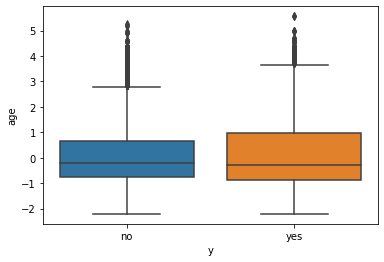

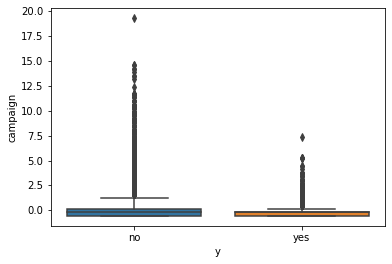

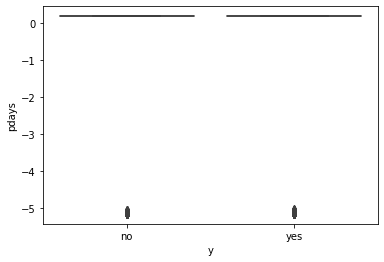

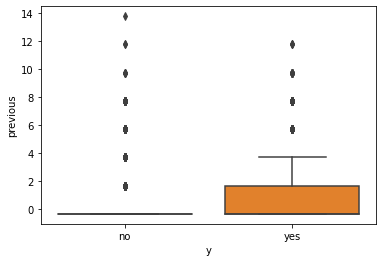

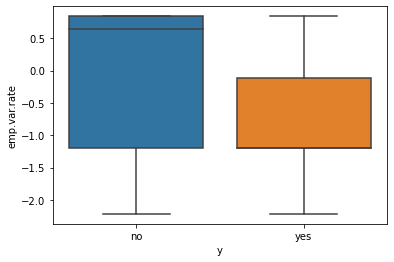

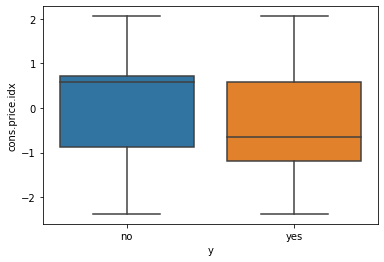

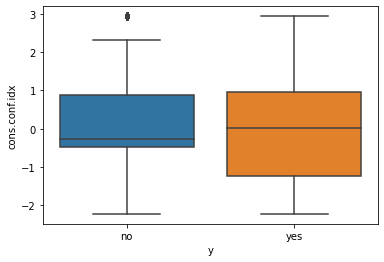

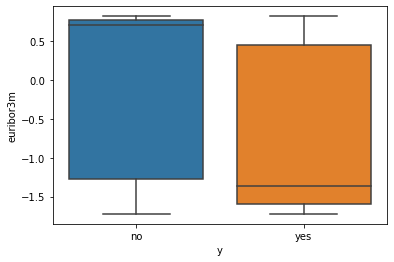

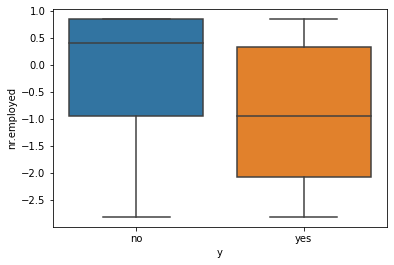

In [62]:
#save the Target variable 
y1 = df_baf_ready['y']

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df_baf_ready)
  plt.show();

## Exploratory Data Analysis for categorical variable

In [63]:
cat_var=[i for i in df_baf_ready.columns if i not in num_var]

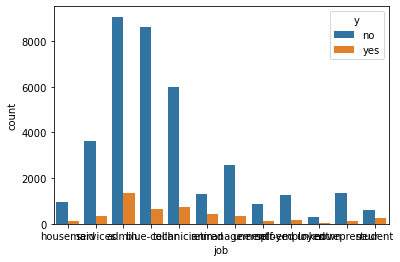

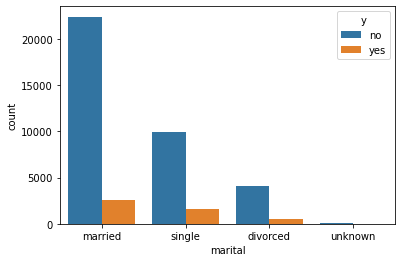

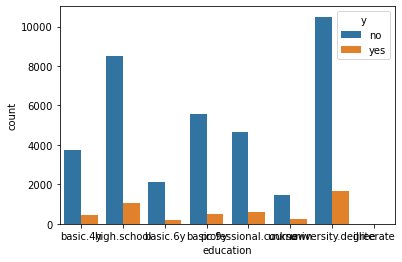

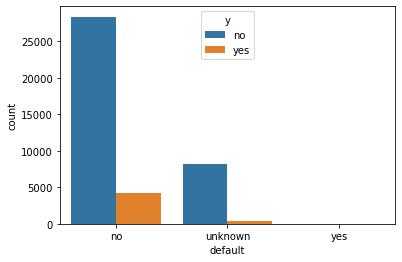

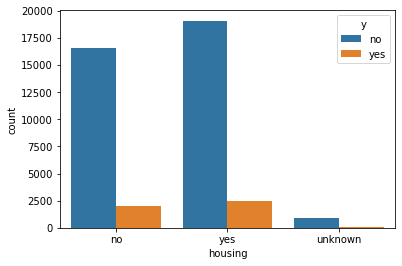

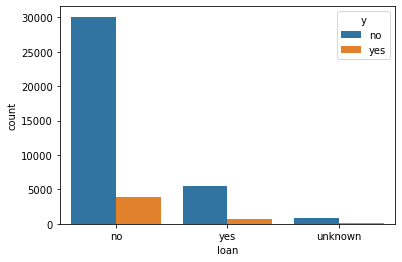

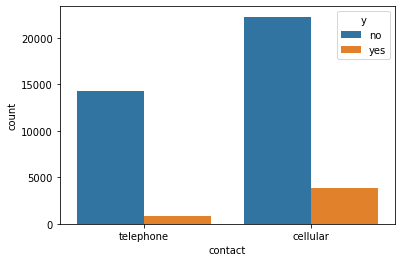

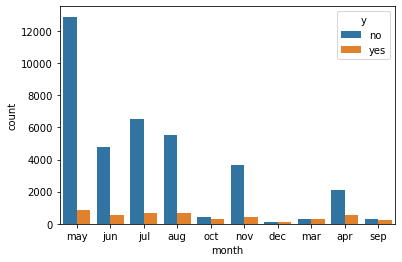

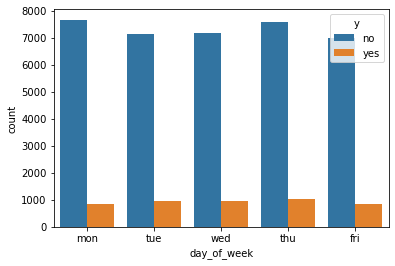

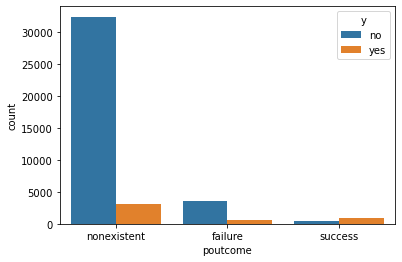

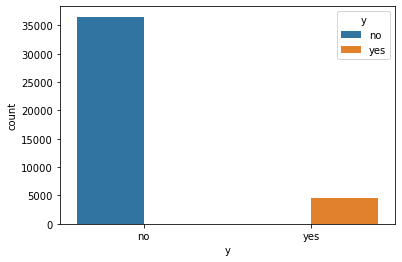

In [64]:
for i in cat_var:
    sns.countplot(x=i, hue=y1, data=df_baf_ready)
    plt.show()

## Encode Categorical Value

In [65]:
#converting the categorical features to numerical value using pandas built-in function

# dataset 1

df_baf_ready_1 = pd.get_dummies(df_baf_ready)

df_baf_ready_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [66]:
df_baf_ready_1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,0,0,1,0,1,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,0,0,1,0,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,0,0,1,0,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,1,...,0,1,0,0,0,0,1,0,1,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,1,0,0,0,0,1,0,1,0


In [67]:
# Encode target value
df_baf_ready_1['y'] = df_baf_ready_1['y_yes'].apply(lambda x: 1 if x == 1 else 0)

df_baf_ready_1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,y
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,0,1,0,1,0,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,0,1,0,1,0,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,0,1,0,1,0,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,1,...,1,0,0,0,0,1,0,1,0,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,1,0,0,0,0,1,0,1,0,0


In [96]:
# lakukan hal yang sama untuk 3 dataset lainnya

# dataset 2
df_ba_ready_1 = pd.get_dummies(df_ba_ready)
df_ba_ready_1['y'] = df_ba_ready_1['y_yes'].apply(lambda x: 1 if x == 1 else 0)

# dataset 3
df_bf_ready_1 = pd.get_dummies(df_bf_ready)
df_bf_ready_1['y'] = df_bf_ready_1['y_yes'].apply(lambda x: 1 if x == 1 else 0)

# dataset 4
df_b_ready_1 = pd.get_dummies(df_b_ready)
df_b_ready_1['y'] = df_b_ready_1['y_yes'].apply(lambda x: 1 if x == 1 else 0)


# 5. Data Analysis

Splitting dataset 1 into train and test data. we will split the data with ratio of 80:20 for training and testing respectively. 

In [68]:
#Keeping aside the target feature and drop it here
y = df_baf_ready_1['y'].values
X = df_baf_ready_1.drop('y',axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_train.shape

(32950, 10)

## Building different Models

In [71]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))

In [82]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.98649468892261
KNN: 0.9970561456752656
Decison-Tree: 0.9915326251896813
Gaussian: 0.9597268588770864
SVM: 0.9981183611532625
RandForest: 0.9924734446130502


SVM obtained the highest accuracy with lesser runtime and is more stable in the results for dataset 1

## Testing with the test data

In [98]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print("Accuracy dataset 1 : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy dataset 1 :  0.8592233009708737
Confusion Matrix : 
 [[678  54]
 [ 62  30]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       732
           1       0.36      0.33      0.34        92

    accuracy                           0.86       824
   macro avg       0.64      0.63      0.63       824
weighted avg       0.85      0.86      0.86       824



## repeat the steps above for other datasets

## dataset 2 

In [97]:
# splitting train and test set
y = df_ba_ready_1['y'].values
X = df_ba_ready_1.drop('y',axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_train.shape

# building model 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.982699640784747
KNN: 0.9836170212765957
Decison-Tree: 0.9714764667956157
Gaussian: 0.9508354057290228
SVM: 0.9954462558717878
RandForest: 0.9802735562310032


In [ ]:
SVM obtained the highest accuracy with lesser runtime and is more stable in the results for dataset 2

In [99]:
# testing with the test data
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print("Accuracy dataset 2 : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy dataset 2 :  0.8871359223300971
Confusion Matrix : 
 [[693  39]
 [ 54  38]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       732
           1       0.49      0.41      0.45        92

    accuracy                           0.89       824
   macro avg       0.71      0.68      0.69       824
weighted avg       0.88      0.89      0.88       824



In [ ]:
accuracy dataset 2 > accuracy dataset 1

## dataset 3

In [100]:
# splitting train and test set
y = df_bf_ready_1['y'].values
X = df_bf_ready_1.drop('y',axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_train.shape

# building model 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9988664256913641
KNN: 0.9979540062169547
Decison-Tree: 0.9947191589739699
Gaussian: 0.99723513258433
SVM: 0.9988387784699098
RandForest: 0.9977604450835654


LogisticRegression obtained the highest accuracy with lesser runtime and is more stable in the results for dataset 3

In [101]:
# testing with the test data
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy dataset 3 : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy dataset 3 :  0.9124184452062368
Confusion Matrix : 
 [[7789  163]
 [ 629  462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7952
           1       0.74      0.42      0.54      1091

    accuracy                           0.91      9043
   macro avg       0.83      0.70      0.75      9043
weighted avg       0.90      0.91      0.90      9043



## dataset 4

In [102]:
# splitting train and test set
y = df_b_ready_1['y'].values
X = df_b_ready_1.drop('y',axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_train.shape

# building model 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9986172540977334
KNN: 0.995299276105355
Decison-Tree: 0.9867242619488529
Gaussian: 0.9964073093463522
SVM: 0.9972352734117935
RandForest: 0.9955755191992777


LogisticRegression obtained the highest accuracy with lesser runtime and is more stable in the results for dataset 4

In [103]:
# testing with the test data
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy dataset 4 : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy dataset 4 :  0.8486187845303867
Confusion Matrix : 
 [[754  53]
 [ 84  14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       807
           1       0.21      0.14      0.17        98

    accuracy                           0.85       905
   macro avg       0.55      0.54      0.54       905
weighted avg       0.82      0.85      0.84       905



accuracy dataset 3 > accuracy dataset 4

## Findings

Dari keempat dataset, dataset 3 memperoleh accuracy lebih besar dari dataset lainnya. Seperti yang kita ketahui bahwa input pada dataset 3 lebih sedikit dari dataset 1 dan 2, sehingga kita bisa saja melakukan improvement agar  accuracy dataset 1 dan 2 meningkat dengan cara menghilangkan kolom input yang 'less meaningful'.  